In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


## Reading the Files

In [2]:
train_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

## Some EDA on the Data

In [3]:
train_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
test_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [7]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
test_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

## Visualizing the Correleation Btw Variables

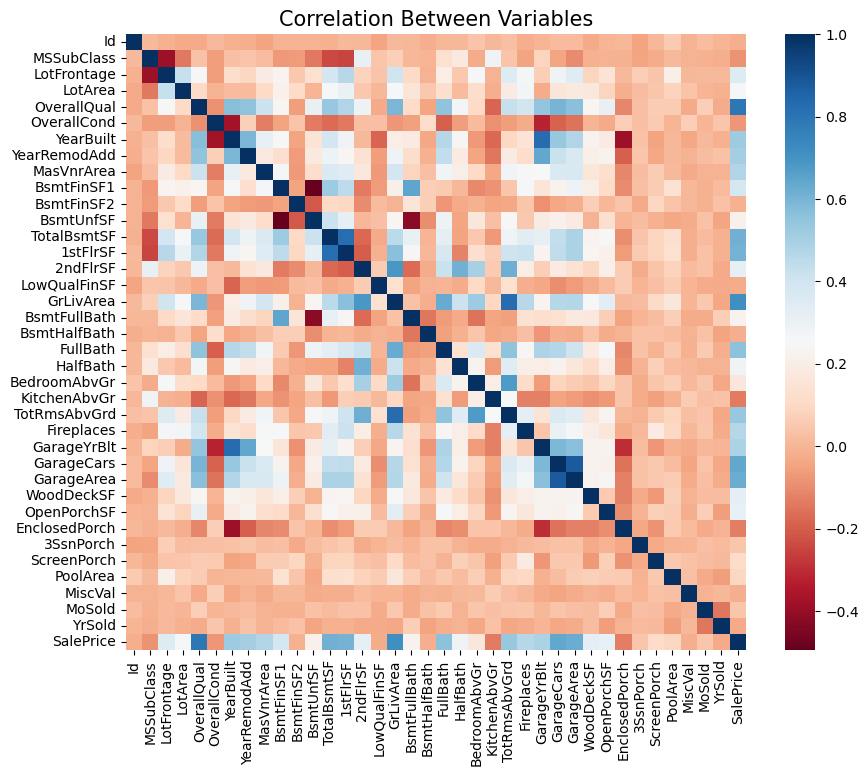

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(train_df.corr(), cmap="RdBu")
plt.title("Correlation Between Variables", size = 15)
plt.show()

## Feature Selection

In [11]:
corr = train_df.corr()["SalePrice"]
imp_cols_num = corr[abs(corr) > 0.5].index.tolist()

In [12]:
imp_cols_num

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

In [13]:
cat_cols = ["MSZoning", "Utilities", "BldgType", "Heating", "KitchenQual", "SaleCondition", "LandSlope"]

In [14]:
imp_cols = imp_cols_num + cat_cols
train_df = train_df.loc[:,imp_cols]


In [15]:
imp_cols1 = imp_cols
imp_cols1.remove("SalePrice")
test_data = test_df.loc[:,imp_cols1]

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OverallQual    1460 non-null   int64 
 1   YearBuilt      1460 non-null   int64 
 2   YearRemodAdd   1460 non-null   int64 
 3   TotalBsmtSF    1460 non-null   int64 
 4   1stFlrSF       1460 non-null   int64 
 5   GrLivArea      1460 non-null   int64 
 6   FullBath       1460 non-null   int64 
 7   TotRmsAbvGrd   1460 non-null   int64 
 8   GarageCars     1460 non-null   int64 
 9   GarageArea     1460 non-null   int64 
 10  SalePrice      1460 non-null   int64 
 11  MSZoning       1460 non-null   object
 12  Utilities      1460 non-null   object
 13  BldgType       1460 non-null   object
 14  Heating        1460 non-null   object
 15  KitchenQual    1460 non-null   object
 16  SaleCondition  1460 non-null   object
 17  LandSlope      1460 non-null   object
dtypes: int64(11), object(7)
memo

In [17]:
test_data.shape

(1459, 17)

## Checking if there are any missing Values

In [18]:
train_df.isnull().sum()

OverallQual      0
YearBuilt        0
YearRemodAdd     0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
FullBath         0
TotRmsAbvGrd     0
GarageCars       0
GarageArea       0
SalePrice        0
MSZoning         0
Utilities        0
BldgType         0
Heating          0
KitchenQual      0
SaleCondition    0
LandSlope        0
dtype: int64

## Visualization to see the Correlation

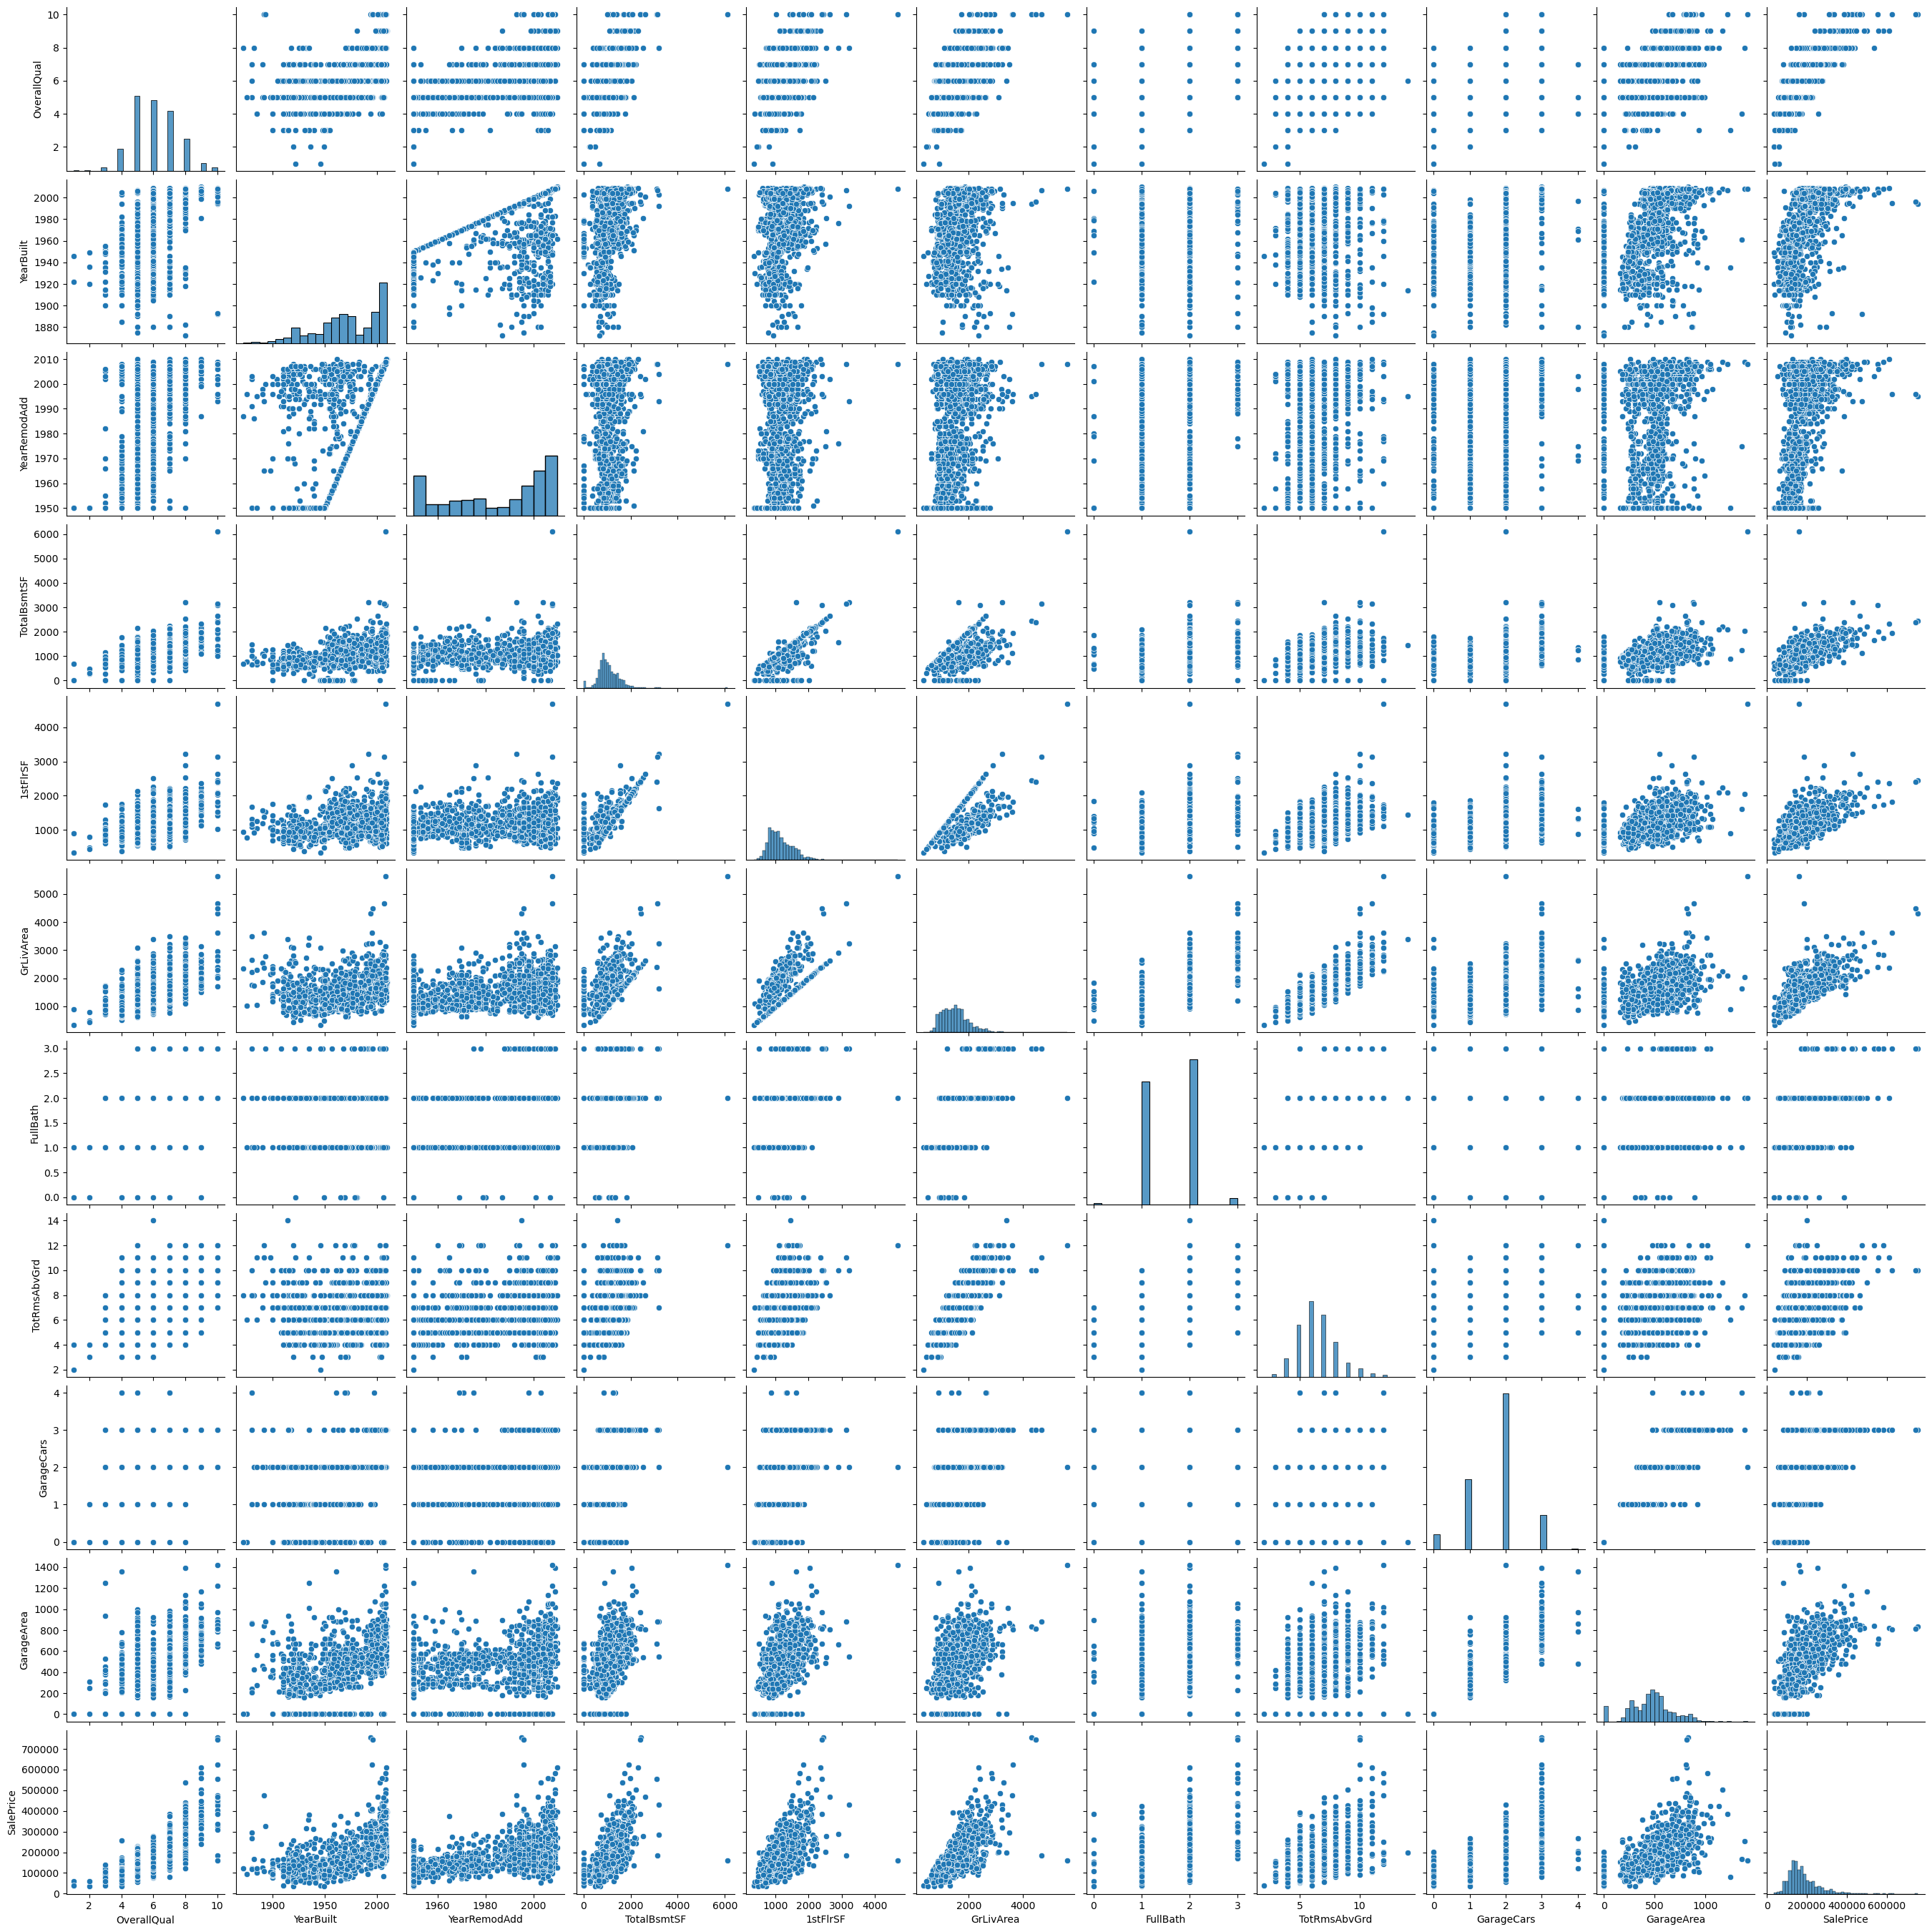

In [19]:
sns.pairplot(train_df[imp_cols_num])

<Figure size 600x400 with 0 Axes>

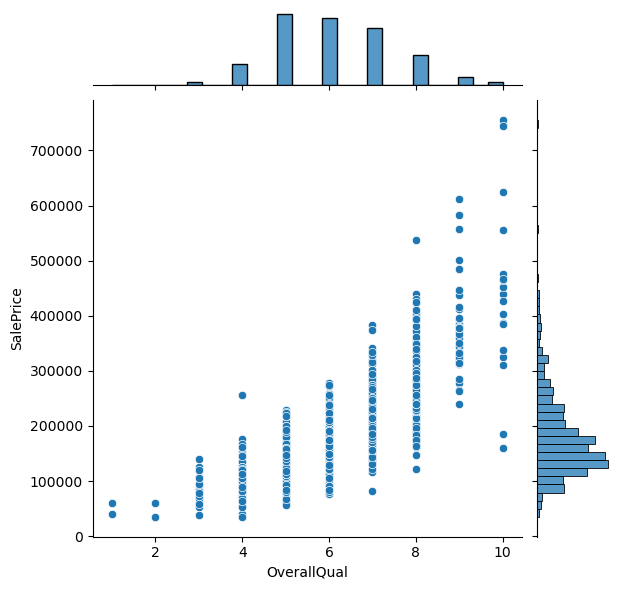

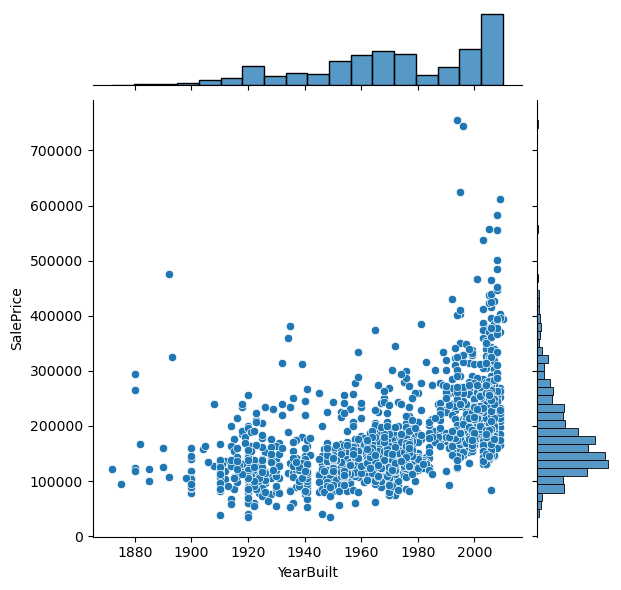

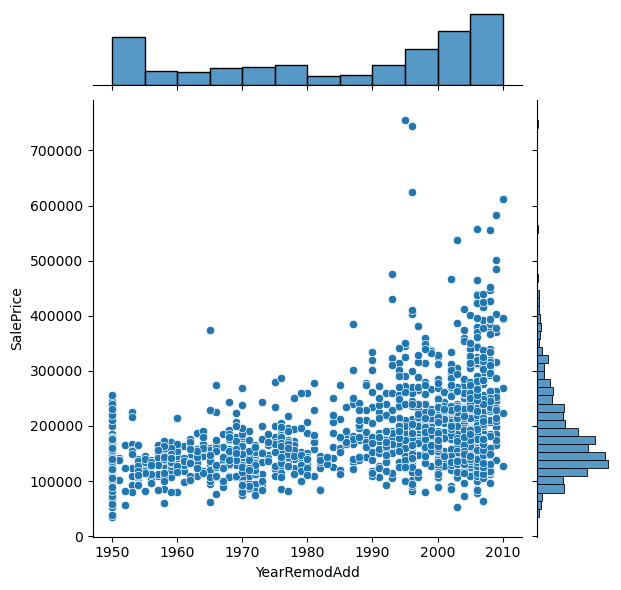

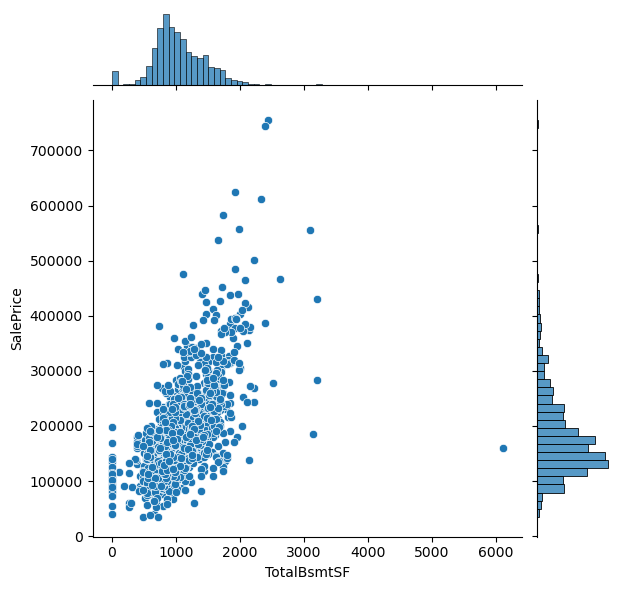

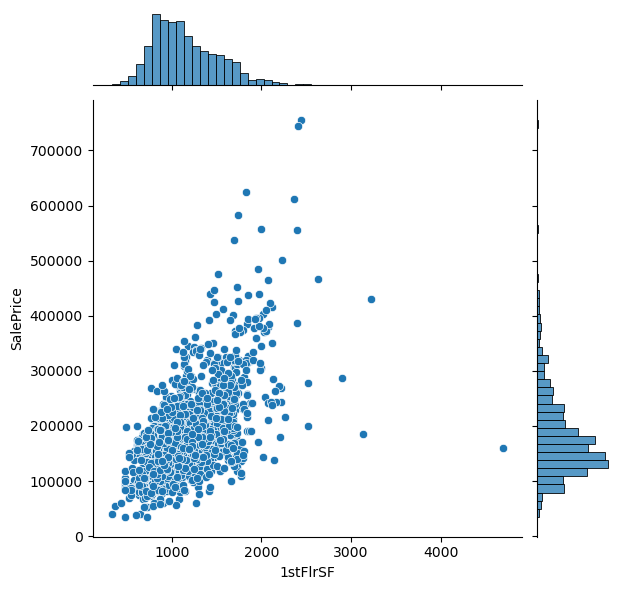

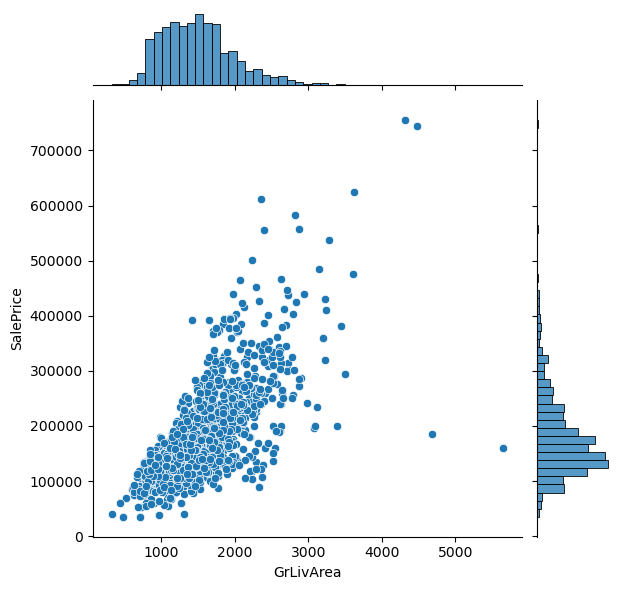

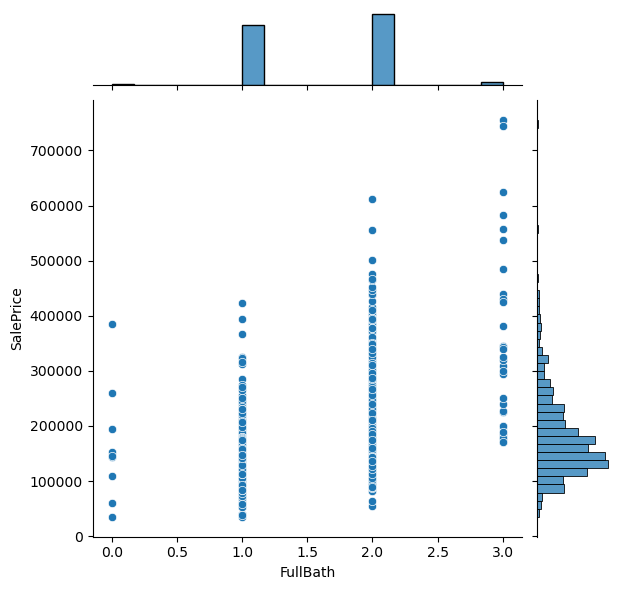

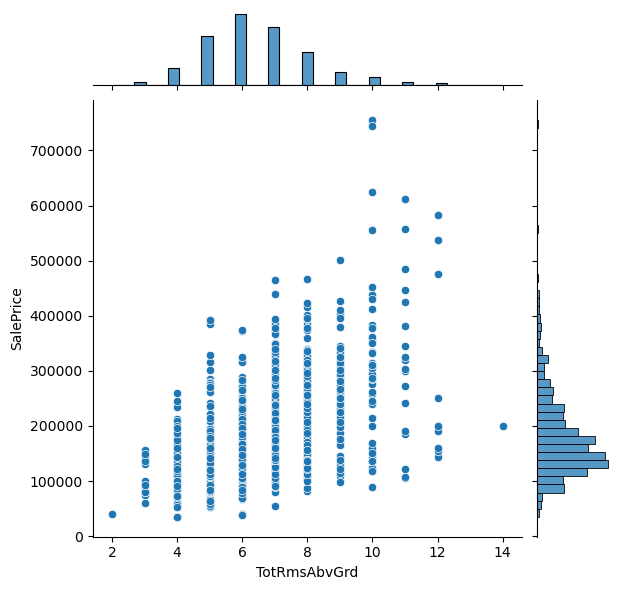

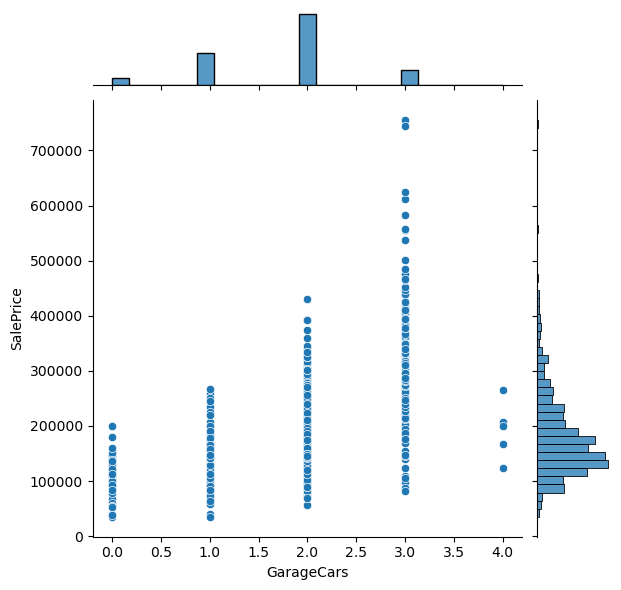

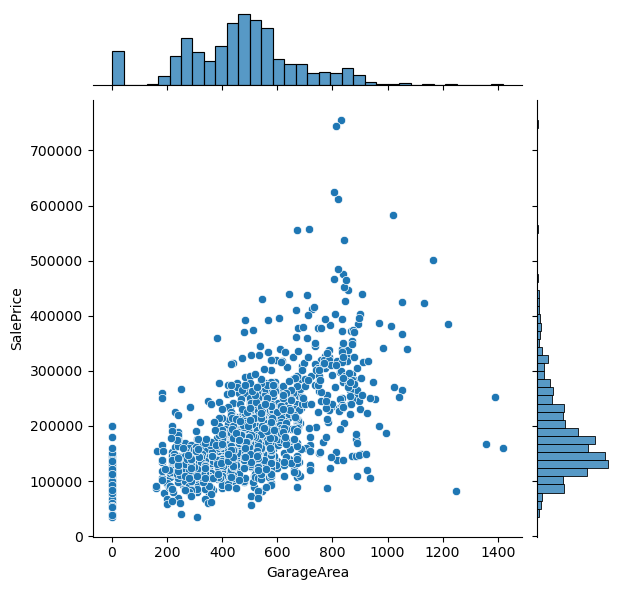

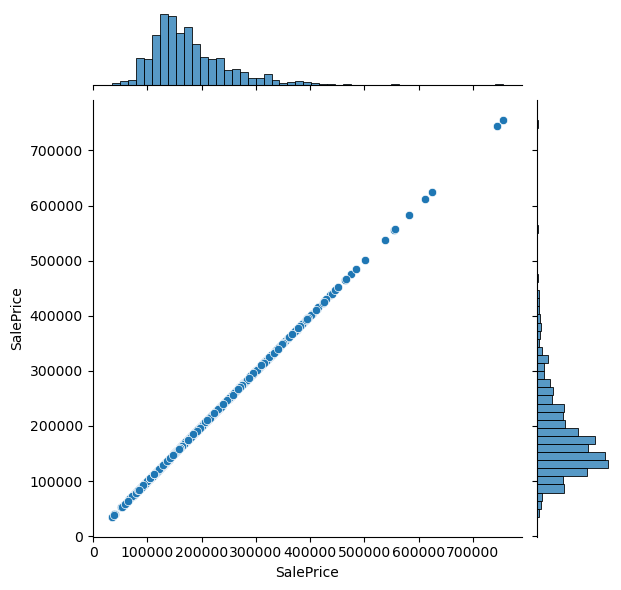

In [20]:
plt.figure(figsize=(6,4))
for i in imp_cols_num:
    sns.jointplot(x = train_df[i], y = train_df["SalePrice"])
plt.show()

## X , Y Split

In [21]:
X = train_df.drop("SalePrice", axis=1)
Y = train_df["SalePrice"]

In [22]:
X.shape

(1460, 17)

In [23]:
Y.shape

(1460,)

In [24]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    1459 non-null   int64  
 1   YearBuilt      1459 non-null   int64  
 2   YearRemodAdd   1459 non-null   int64  
 3   TotalBsmtSF    1458 non-null   float64
 4   1stFlrSF       1459 non-null   int64  
 5   GrLivArea      1459 non-null   int64  
 6   FullBath       1459 non-null   int64  
 7   TotRmsAbvGrd   1459 non-null   int64  
 8   GarageCars     1458 non-null   float64
 9   GarageArea     1458 non-null   float64
 10  MSZoning       1455 non-null   object 
 11  Utilities      1457 non-null   object 
 12  BldgType       1459 non-null   object 
 13  Heating        1459 non-null   object 
 14  KitchenQual    1458 non-null   object 
 15  SaleCondition  1459 non-null   object 
 16  LandSlope      1459 non-null   object 
dtypes: float64(3), int64(7), object(7)
memory usage: 193

## One Hot Encoding

In [25]:
# X = pd.get_dummies(X, columns=cat_cols)
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_cols = ['MSZoning', 'Utilities', 'BldgType', 'Heating', 'KitchenQual', 'SaleCondition', 'LandSlope']
X[cat_cols] = X[cat_cols].apply(le.fit_transform)

In [26]:
# X.head(3)
X.shape

(1460, 17)

In [27]:
test_data.isna().sum()

OverallQual      0
YearBuilt        0
YearRemodAdd     0
TotalBsmtSF      1
1stFlrSF         0
GrLivArea        0
FullBath         0
TotRmsAbvGrd     0
GarageCars       1
GarageArea       1
MSZoning         4
Utilities        2
BldgType         0
Heating          0
KitchenQual      1
SaleCondition    0
LandSlope        0
dtype: int64

In [28]:
test_data.head(3)

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope
0,5,1961,1961,882.0,896,896,1,5,1.0,730.0,RH,AllPub,1Fam,GasA,TA,Normal,Gtl
1,6,1958,1958,1329.0,1329,1329,1,6,1.0,312.0,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
2,5,1997,1998,928.0,928,1629,2,6,2.0,482.0,RL,AllPub,1Fam,GasA,TA,Normal,Gtl


In [29]:
# test_data.dropna(inplace=True)
test_data['TotalBsmtSF'].fillna(test_data['TotalBsmtSF'].median(), inplace=True)
test_data['GarageCars'].fillna(test_data['GarageCars'].median(), inplace=True)
test_data['GarageArea'].fillna(test_data['GarageArea'].median(), inplace=True)
test_data['MSZoning'].fillna(test_data['MSZoning'].mode(), inplace=True)
test_data['Utilities'].fillna(test_data['Utilities'].mode(), inplace=True)
test_data['KitchenQual'].fillna(test_data['KitchenQual'].mode(), inplace=True)

In [30]:
test_data.isna().sum()

OverallQual      0
YearBuilt        0
YearRemodAdd     0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
FullBath         0
TotRmsAbvGrd     0
GarageCars       0
GarageArea       0
MSZoning         4
Utilities        2
BldgType         0
Heating          0
KitchenQual      1
SaleCondition    0
LandSlope        0
dtype: int64

In [31]:
test_data[cat_cols] = test_data[cat_cols].apply(le.fit_transform)

In [32]:
# test_data = test_data.loc[:,imp_cols1]
test_data.shape

(1459, 17)

In [33]:
X.head(3)

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope
0,7,2003,2003,856,856,1710,2,8,2,548,3,0,0,1,2,4,0
1,6,1976,1976,1262,1262,1262,2,6,2,460,3,0,0,1,3,4,0
2,7,2001,2002,920,920,1786,2,6,2,608,3,0,0,1,2,4,0


In [34]:
imp_cols_num.remove("SalePrice")

In [35]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Standardizing the data

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[imp_cols_num] = scaler.fit_transform(X[imp_cols_num])

In [37]:
X.head(3)

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope
0,0.651479,1.050994,0.878668,-0.459303,-0.793434,0.370333,0.789741,0.912210,0.311725,0.351000,3,0,0,1,2,4,0
1,-0.071836,0.156734,-0.429577,0.466465,0.257140,-0.482512,0.789741,-0.318683,0.311725,-0.060731,3,0,0,1,3,4,0
2,0.651479,0.984752,0.830215,-0.313369,-0.627826,0.515013,0.789741,-0.318683,0.311725,0.631726,3,0,0,1,2,4,0


## Train Test Split For Better evaluation

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state = 42, test_size = 0.2)

In [39]:
2+2


4

## Applying XGBoost Regressor

In [40]:
from sklearn.svm import SVR
svr = SVR(C=100000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [42]:
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 17657.855131652737
MSE: 998670267.0217885
RMSE: 31601.74468319413
R2 Score: 0.8698008089817575


In [43]:
test_passenger_ids = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')["Id"]

In [44]:
test_preds = svr.predict(test_data)

In [45]:
submission_df = pd.DataFrame({'Id': test_passenger_ids, 'SalePrice': test_preds})
submission_df.to_csv('submission.csv', index=False)

In [46]:
submission_df.head(3)

,Id,SalePrice
0,1461,185946.29936
1,1462,185946.29936
2,1463,185946.29936
